# Tutorial for PyDruglogics


This tutorial demonstrates the use of PyDruglogics for optimizing of Boolean Models and predict drug synergy effects.
The PyDruglogics pipeline implementation on based on the paper [Fine tuning a logical model of cancer cells to predict drug synergies: combining manual curation and automated parameterization](https://www.frontiersin.org/journals/systems-biology/articles/10.3389/fsysb.2023.1252961/full).

More information about the package on [GitHub](https://github.com/druglogics/pydruglogics).

### Core Features
- Construct Boolean Model from .sif file
- Optimize Boolean Model
- Generate perturbed models
- Evaluate drug synergies


## Initialization, loading files

The parameters and the initialization of the pipeline are summarized in this section. These are the neccesary components for constructing, training, and applying predictive models effectively.

In [1]:
from pydruglogics.model import BooleanModel as bm
from pydruglogics.model import Statistics as st
from pydruglogics.model import Evolution as ev
from pydruglogics.model import ModelPredictions as mp
from pydruglogics.model import BooleanModelOptimizer as bmopt
from pydruglogics.model import InteractionModel as im
from pydruglogics.input import ModelOutputs as mo
from pydruglogics.input import TrainingData as td
from pydruglogics.input import Perturbations as pt

#### Model Outputs
Defines the network nodes and their respective weights used to calculate a global output response for the Boolean Model. \
**Initialization:**
1. **From a File**: Load target states from a file that specifies node-state pairs.\
2. **From a Dictionary**: Define directly using a dictionary where each key-value pair represents a node and its integer weight.

In [2]:
model_outputs_dict = {
        "RSK_f": 1.0,
        "MYC": 1.0,
        "TCF7_f": 1.0,
        "CASP8": -1.0,
        "CASP9": -1.0,
        "FOXO_f": -1.0
    }
model_outputs = mo.ModelOutputs(input_dictionary=model_outputs_dict)

2024-11-10 20:25:04,904 - INFO - Model outputs are initialized from dictionary.


In [3]:
model_outputs.print()

Model output: RSK_f, weight: 1.0
Model output: MYC, weight: 1.0
Model output: TCF7_f, weight: 1.0
Model output: CASP8, weight: -1.0
Model output: CASP9, weight: -1.0
Model output: FOXO_f, weight: -1.0


#### Training Data
Inclues condition-response pairs (observations) and a weight number used to calculate the weighted average fitness of the Boolean Models.\
**Initialization:**

1. **From a File**: Load target states from a structured file.

In [4]:
training_data_file = './ags_cascade_1.0/training'
training_data = td.TrainingData(input_file=training_data_file)

2024-11-10 20:25:05,379 - INFO - Training data loaded from file: ./ags_cascade_1.0/training.


2. **From a Dictionary**: Define directly using a dictionary.

In [5]:
 observations = [(["CASP3:0", "CASP8:0","CASP9:0","FOXO_f:0","RSK_f:1","CCND1:1",
                      "MYC:1","RAC_f:1","JNK_f:0","MAPK14:0","AKT_f:1","MMP_f:1",
                      "PTEN:0","ERK_f:1","KRAS:1","PIK3CA:1","S6K_f:1","GSK3_f:0",
                      "TP53:0","BAX:0","BCL2:1","CTNNB1:1","TCF7_f:1","NFKB_f:1"], 1.0)]

In [6]:
training_data = td.TrainingData(observations=observations)

2024-11-10 20:25:06,203 - INFO - Training data initialized from list.


In [7]:
training_data.print()

Observation:
Condition: -
Response: CASP3:0, CASP8:0, CASP9:0, FOXO_f:0, RSK_f:1, CCND1:1, MYC:1, RAC_f:1, JNK_f:0, MAPK14:0, AKT_f:1, MMP_f:1, PTEN:0, ERK_f:1, KRAS:1, PIK3CA:1, S6K_f:1, GSK3_f:0, TP53:0, BAX:0, BCL2:1, CTNNB1:1, TCF7_f:1, NFKB_f:1
Weight: 1.0



#### Perturbations
Defines the drugs and perturbations applied to the Boolean Models, affecting the nodes in the network.

Initialization **From Dictionary**:
1. **Define** a `drug_data` **and** `perturbation_data`: Provide a list of drugs with their name, targets, and effect (Options:  `inhibits` (default) or `activates`). Specify a list of perturbations, where each entry is a drug combination.
2. **Define only** `drug_data`: If no `perturbation_data` is given, perturbations will be generated automatically by creating all possible single-drug and two-drug combinations from the drug panel.

In [8]:
 drug_data = [
        ['PI', 'PIK3CA', 'inhibits'],
        ['PD', 'MEK_f'],
        ['CT','GSK3_f'],
        ['BI', 'MAPK14'],
        ['PK', 'CTNNB1'],
        ['AK', 'AKT_f'],
        ['5Z', 'MAP3K7']
    ]

**Note**: The `perturbation_data` is **optional**. If only the `drug_data` is given, all perturbations are calculated.

In [9]:
perturbation_data = [
        ['PI'],
        ['PD'],
        ['CT'],
        ['BI'],
        ['PK'],
        ['AK'],
        ['5Z'],
        ['PI', 'PD'],
        ['PI', 'CT'],
        ['PI', 'BI'],
        ['PI', 'PK'],
        ['PI', 'AK'],
        ['PI', '5Z'],
        ['PD', 'CT'],
        ['PD', 'BI'],
        ['PD', 'PK'],
        ['PD', 'AK'],
        ['PD', '5Z'],
        ['CT', 'BI'],
        ['CT', 'PK'],
        ['CT', 'AK'],
        ['CT', '5Z'],
        ['BI', 'PK'],
        ['BI', 'AK'],
        ['BI', '5Z'],
        ['PK', 'AK'],
        ['PK', '5Z'],
        ['AK', '5Z']]

In [10]:
perturbations = pt.Perturbation(drug_data=drug_data, perturbation_data=perturbation_data)

2024-11-10 20:25:10,026 - INFO - Drug panel data initialized from list.
2024-11-10 20:25:10,028 - INFO - Drug perturbations initialized.


In [11]:
perturbations.print()

[PI (targets: PIK3CA)]
[PD (targets: MEK_f)]
[CT (targets: GSK3_f)]
[BI (targets: MAPK14)]
[PK (targets: CTNNB1)]
[AK (targets: AKT_f)]
[5Z (targets: MAP3K7)]
[PI (targets: PIK3CA), PD (targets: MEK_f)]
[PI (targets: PIK3CA), CT (targets: GSK3_f)]
[PI (targets: PIK3CA), BI (targets: MAPK14)]
[PI (targets: PIK3CA), PK (targets: CTNNB1)]
[PI (targets: PIK3CA), AK (targets: AKT_f)]
[PI (targets: PIK3CA), 5Z (targets: MAP3K7)]
[PD (targets: MEK_f), CT (targets: GSK3_f)]
[PD (targets: MEK_f), BI (targets: MAPK14)]
[PD (targets: MEK_f), PK (targets: CTNNB1)]
[PD (targets: MEK_f), AK (targets: AKT_f)]
[PD (targets: MEK_f), 5Z (targets: MAP3K7)]
[CT (targets: GSK3_f), BI (targets: MAPK14)]
[CT (targets: GSK3_f), PK (targets: CTNNB1)]
[CT (targets: GSK3_f), AK (targets: AKT_f)]
[CT (targets: GSK3_f), 5Z (targets: MAP3K7)]
[BI (targets: MAPK14), PK (targets: CTNNB1)]
[BI (targets: MAPK14), AK (targets: AKT_f)]
[BI (targets: MAPK14), 5Z (targets: MAP3K7)]
[PK (targets: CTNNB1), AK (targets: AKT_f

### Initialize Boolean Model
A `BooleanModel` defines the network and logical rules for node interactions, used for generating predictions and simulations.\
There are **two ways** for initialization:

#### Initialize Boolean Model from `.sif` file

##### Creating an `InteractionModel`, that can be initialized:
  - `interaction_file` (required): The path to the `.sif` file.
  - `model_name`: name of the model, by default the `.sif` file name will be set.
  - `remove_self_regulated_interactions`: Remove self regulated interactions. The default is `False`.
  - `remove_inputs`: Trim inputs from the model. The deafult is `False`.
  - `remove_outputs`: Trim ouputs from the model. The default is `False`.
##### Creating a `BooleanModel`, that can be initialized:
  - `model` (required): Interaction Model
  - `model_name`: The name of the model, by default the `.sif` file name will be set
  - `mutation_type`: There are 3 options: `topology`, `mixed`, `balanced`. The default is `balanced`.
  - `attractor_tool`: There are 2 options: `mpbn` or `pyboolnet` The default is `mpbn`
  - `attractor_type`:There are 2 options: `stable_states` or `trapspaces`. The default is `stable_states`.


In [12]:
network_sif = './ags_cascade_1.0/network.sif'
model = im.InteractionModel(interactions_file=network_sif)
model.print()

2024-11-10 20:25:11,520 - INFO - Interactions loaded successfully
Target: Antisurvival, activating regulators: FOXO_f, CASP3
Target: CASP3, activating regulators: CASP9, CASP8
Target: FOXO_f, inhibitory regulators: AKT_f, NLK
Target: Prosurvival, activating regulators: CCND1, MYC
Target: CCND1, activating regulators: TCF7_f, RSK_f
Target: MYC, activating regulators: TCF7_f
Target: RAC_f, activating regulators: DVL_f, mTORC2_c
Target: mTORC2_c, activating regulators: TSC_f, inhibitory regulators: S6K_f
Target: DVL_f, activating regulators: FZD_f
Target: MAP3K4, activating regulators: RAC_f
Target: MAP3K11, activating regulators: RAC_f
Target: MAP2K4, activating regulators: MAP3K11, GRAP2, MAP3K7, MAP3K4
Target: MAP3K7, activating regulators: TAB_f
Target: GRAP2, inhibitory regulators: MAPK14
Target: MAP2K7, activating regulators: MAP3K7, GRAP2
Target: JNK_f, activating regulators: MAP2K4, MAP2K7, inhibitory regulators: DUSP1
Target: DUSP1, activating regulators: MSK_f, MAPK14
Target: MA

In [13]:
boolean_model_sif = bm.BooleanModel(model=model, model_name='test1',
                                     mutation_type='balanced', attractor_tool='mpbn', attractor_type='stable_states')

2024-11-10 20:25:11,739 - INFO - Boolean Model from Interaction Model is created.


In [14]:
boolean_model_sif.print()

Antisurvival *= (FOXO_f or CASP3)
CASP3 *= (CASP9 or CASP8)
FOXO_f *= not (AKT_f or NLK)
Prosurvival *= (CCND1 or MYC)
CCND1 *= (TCF7_f or RSK_f)
MYC *= (TCF7_f)
RAC_f *= (DVL_f or mTORC2_c)
mTORC2_c *= (TSC_f) and not (S6K_f)
DVL_f *= (FZD_f)
MAP3K4 *= (RAC_f)
MAP3K11 *= (RAC_f)
MAP2K4 *= (MAP3K11 or GRAP2 or MAP3K7 or MAP3K4)
MAP3K7 *= (TAB_f)
GRAP2 *= not (MAPK14)
MAP2K7 *= (MAP3K7 or GRAP2)
JNK_f *= (MAP2K4 or MAP2K7) and not (DUSP1)
DUSP1 *= (MSK_f or MAPK14)
MAPK14 *= (MAP2K4 or MAP2K3) and not (DUSP1)
MAP2K3 *= (MAP3K7 or MAP3K5)
MAP3K5 *= not (AKT_f)
AKT_f *= (PDPK1 or mTORC2_c)
TAB_f *= not (MAPK14)
MSK_f *= (MAPK14 or ERK_f)
RTPK_f *= (RTPK_g or MMP_f) and not (MEK_f or MAPK14)
RTPK_g *= (FOXO_f)
MEK_f *= (RAF_f or MAP3K8) and not (ERK_f)
SHC1 *= (RTPK_f) and not (PTEN)
PTEN *= (PTEN_g) and not (GSK3_f)
GRB2 *= (SHC1)
SOS1 *= (GRB2) and not (ERK_f)
ERK_f *= (MEK_f) and not (DUSP6)
KRAS *= (SOS1 or PTPN11)
PTPN11 *= (GAB_f)
RAF_f *= (KRAS) and not (AKT_f or RHEB or ERK_f)
RHEB

#### Initialize Boolean Model from `.bnet` file

**Creating a `BooleanModel`, that can be initialized:**
  - `file` (required): The path to the `.bnet` file.
  - `model_name`: The name of the model.
  - `mutation_type`: There are 3 options: `topology`, `mixed`, `balanced`. The default is balanced
  - `attractor_tool`: There are 2 options: `mpbn` or `pyboolnet` The default is `mpbn`
  - `attractor_type`:There are 2 options: `stable_states` or `trapspaces`. The default is `stable_states`.

In [15]:
equations_bnet = './ags_cascade_1.0/network.bnet'
boolean_model_bnet = bm.BooleanModel(file=equations_bnet, model_name='test2',
                                     mutation_type='topology', attractor_tool='mpbn', attractor_type='trapspaces')

2024-11-10 20:25:13,195 - INFO - Boolean Model from .bnet file is created.


## Run Train and Predict with `executor`

**Required Parameters:**
- `BooleanModel`,
- `ModelOutputs`,
- `Perturbations`
- Genetic Algorithm Arguments (`ga_args`)
- Evolution Arguments (`ev_args`)
- Observed Synergy Scores (`observed_synergy_scores`)

**Optional Parameters:**
- `Training Data`

### Initialize Train and Predict

To run training and prediction, have to set up `train_params` and `predict_params`, which define how the executor handles model training and simulations. Below, you can see how to initialize these parameters.



#### 1. `train_params`
This dictionary holds the configuration and input data necessary for training Boolean Models.\
Below is a detailed overview of its parameters:

- `boolean_model`: The initial `BooleanModel` instance that serves as the starting point for training.


- `model_outputs`: An instance of `ModelOutputs`.

- `training_data` (optional): An instance of `TrainingData`.

- `ga_args`: A dictionary of arguments and configurations for the genetic algorithm.

- `ev_args`: A dictionary of arguments for the evolutionary strategy settings. It runs multiple times the genetic algorithm.

- `save_best_models`: Whether to save the models with the best fitness score to disk. By defult, `False`
  

- `save_path` (optional): The path where the best models will be saved if `save_best_models` is `True`.(e.g., `'./models'`).

##### Arguments for the Genetic Algorithm (`ga_args`)
The Evolution pipeline uses the `PyGAD` Genetic Algoritm . For more information about the initialization click [here](https://pygad.readthedocs.io/en/latest/pygad.html#init) .

In [16]:
ga_args = {
        'num_generations': 20,
        'num_parents_mating': 3,
        'mutation_num_genes': 3,
        'fitness_batch_size': 20,
        'crossover_type': 'single_point',
        'mutation_type': 'random',
        'keep_elitism': 0,
        # 'stop_criteria': 'reach_95'
}

##### Arguments for the Evolution (`ev_args`)
- `num_best_solutions`: Number of the best solutions per Evolution run. 
- `num_of_runs`: Number of running the Evolution
- `num_of_cores`: Maximum number of cores for calculations
- `num_of_init_mutation`: Number of mutated genes in the initial population.

In [17]:
ev_args = {
        'num_best_solutions': 3,
        'num_of_runs': 30,
        'num_of_cores': 4,
        'num_of_init_mutation': 10
}

##### Init `train_params`

In [18]:
train_params = {
        'boolean_model': boolean_model_sif,
        'model_outputs': model_outputs,
        'training_data': training_data,
        'ga_args': ga_args,
        'ev_args': ev_args,
        'save_best_models': False,
        # 'save_path': './models'
}

#### 2. `predict_params`
This dictionary holds the necessary configurations for the `predict` function, which simulates perturbed models and predicts drug synergies.\
Below is a detailed overview of its parameters:

- `perturbations`: An instance of `Perturbation`.

- `model_outputs`: An instance of `ModelOutputs`.

- `observed_synergy_scores`: A list of observed synergy scores used to plot and evaluate the predictive accuracy of the models.

- `synergy_method`: The method used to calculate synergy scores. Options: `'bliss'` (Bliss Independence) or `'hsa'` (Highest Single Agent). By default, `'hsa'`

- `save_predictions` (optional):  Whether to save the predictions to disk after the simulations. By default, `False`.

- `save_path` (optional): Specifies the path to save the predictions if `save_predictions` is `True`. (e.g., `'./predictions'`).

- `model_directory`: Path to a directory containing pre-trained models to be loaded if `best_boolean_models` is not provided.(e.g., `'./models/models_2024_11_06_1130'`).

- `attractor_tool`: Specifies the tool used for attractor computation if the models are loaded from `model_directory` (e.g. `'mpbn'`).


- `attractor_type`: Specifies the tool used for attractor computation if the models are loaded from `model_directory` (e.g. `'stable_states'`).

- `cores`: Number of CPU cores to use for parallel processing.(e.g. `4` for using four CPU cores).

#####   Observed Synergy Scores
List of observed synergy scores corresponding to the perturbations applied, used to evaluate model predictions. \
**Initialization**: From a list containing observed synergy scores.

In [19]:
observed_synergy_scores = ["PI-PD", "PI-5Z", "PD-AK", "AK-5Z"]

##### Init `predict_param`

In [20]:
predict_params = {
        'perturbations': perturbations,
        'model_outputs': model_outputs,
        'observed_synergy_scores': observed_synergy_scores,
        'synergy_method': 'bliss',
        'save_predictions': False,
        # 'save_path': './predictions',
        # 'model_directory': './models/example_models',
        # 'attractor_tool': 'mpbn',
        # 'attractor_type':  'stable_states'
    }

### Run Train and Predict

In [21]:
from pydruglogics.execution.Executor import execute, train, predict

2024-11-10 20:26:23,594 - INFO - Train started...
2024-11-10 20:26:32,169 - INFO - Training finished.
2024-11-10 20:26:32,170 - INFO - Train completed in 8.58 seconds.
2024-11-10 20:26:32,170 - INFO - Predict started...
2024-11-10 20:26:41,235 - INFO - 
Response Matrix:
2024-11-10 20:26:41,236 - INFO -       e1_s1 e1_s2  e1_s3 e2_s1 e2_s2 e2_s3 e3_s1  e3_s2  e3_s3 e4_s1 e4_s2  \
PI-PD   3.0   0.0    0.0    NA   1.0   0.0    NA    3.0    3.0    NA    NA   
PI-CT   3.0    NA    0.0   3.0    NA   0.0   3.0    3.0    3.0    NA    NA   
PI-BI   3.0    NA   -1.0   3.0    NA    NA   3.0    3.0    2.0    NA    NA   
PI-PK   3.0    NA    0.0   1.0    NA   0.0   1.0    3.0    3.0    NA    NA   
PI-AK   1.0    NA    0.0   3.0    NA   0.0   3.0    1.0    1.0   1.0   2.0   
PI-5Z   3.0    NA    0.0   2.0    NA   0.0   3.0    3.0    3.0    NA    NA   
PD-CT   3.0   3.0    3.0    NA   3.0   3.0    NA    3.0    3.0   3.0   3.0   
PD-BI   2.0   2.0    0.5   3.0   1.0   2.0   3.0    2.0    2.0   2.0   3

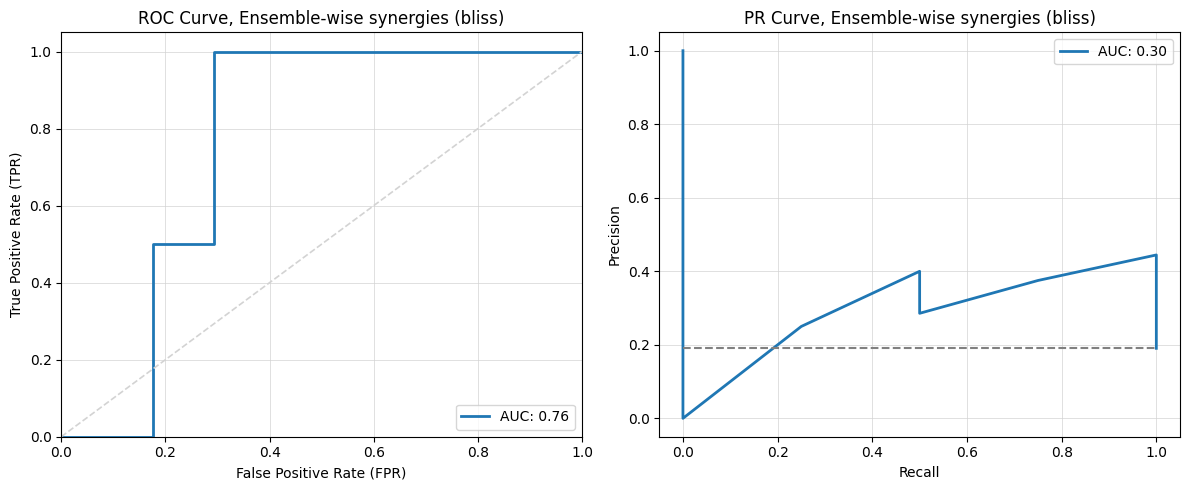

2024-11-10 20:26:41,436 - INFO - Predict completed in 9.27 seconds.
2024-11-10 20:26:41,437 - INFO - Total runtime for training and prediction: 17.84 seconds


In [23]:
execute(train_params=train_params, predict_params=predict_params)

### Run Train

In [30]:
execute(train_params=train_params)

2024-11-10 19:32:23,366 - INFO - Train started...
2024-11-10 19:32:31,782 - INFO - Training finished.
2024-11-10 19:32:31,796 - INFO - Models saved to ./models
2024-11-10 19:32:31,796 - INFO - Train completed in 8.43 seconds.


### Run Predict

**Note:** If the Evolution process has not been previously executed, it is necessary to load the Boolean Models from a `.bnet` file. In this case `attractor_tool` and `attracto_type` must be provided.

In [26]:
predict_params = {
        'perturbations': perturbations,
        'model_outputs': model_outputs,
        'observed_synergy_scores': observed_synergy_scores,
        'synergy_method': 'bliss',
        'save_predictions': True,
        'save_path': './predictions',
        'model_directory': './pydruglogics/models/example_models',
        'attractor_tool': 'mpbn',
        'attractor_type':  'stable_states'
    }

2024-11-10 20:27:17,516 - INFO - Predict started...
2024-11-10 20:27:17,518 - INFO - Loading models from directory: ./pydruglogics/models/example_models
2024-11-10 20:27:17,520 - INFO - Boolean Model from .bnet file is created.
2024-11-10 20:27:17,538 - INFO - Loaded model from ./pydruglogics/models/example_models/e8_s1.bnet
2024-11-10 20:27:17,538 - INFO - Boolean Model from .bnet file is created.
2024-11-10 20:27:17,553 - INFO - Loaded model from ./pydruglogics/models/example_models/e31_s3.bnet
2024-11-10 20:27:17,554 - INFO - Boolean Model from .bnet file is created.
2024-11-10 20:27:17,571 - INFO - Loaded model from ./pydruglogics/models/example_models/e4_s3.bnet
2024-11-10 20:27:17,572 - INFO - Boolean Model from .bnet file is created.
2024-11-10 20:27:17,585 - INFO - Loaded model from ./pydruglogics/models/example_models/e18_s2.bnet
2024-11-10 20:27:17,586 - INFO - Boolean Model from .bnet file is created.
2024-11-10 20:27:17,598 - INFO - Loaded model from ./pydruglogics/models/e

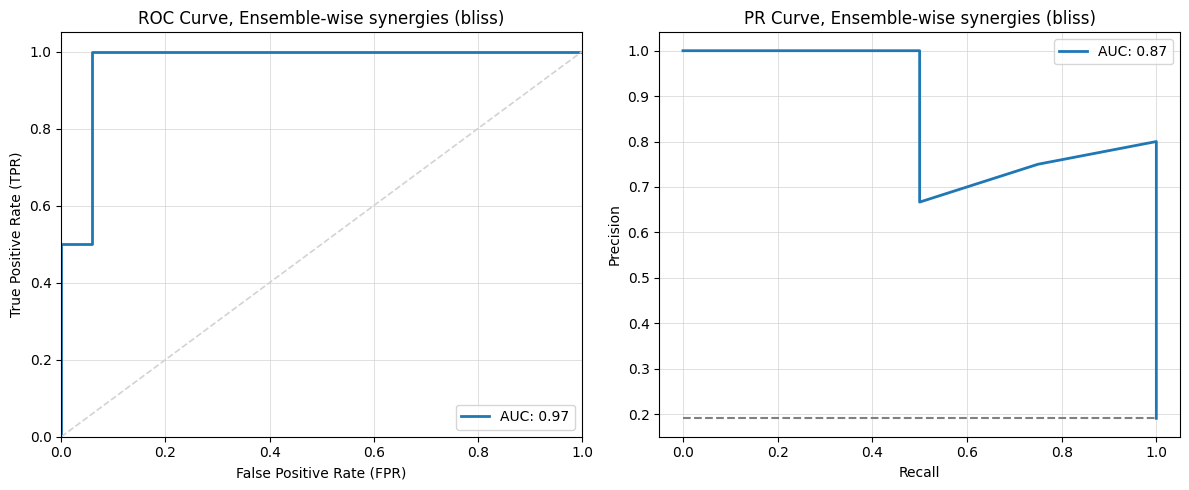

2024-11-10 20:27:34,524 - INFO - Predictions saved to ./predictions/predictions_2024_11_10_2027
2024-11-10 20:27:34,527 - INFO - Predict completed in 17.01 seconds.


In [27]:
execute(predict_params=predict_params)

## Run Statistics

#### Train Boolean Models

Boolean Models calibrated to steady state response

In [31]:
best_boolean_models_calibrated = train(boolean_model=boolean_model_sif, model_outputs=model_outputs, training_data=training_data,
                                ga_args=ga_args, ev_args=ev_args)

2024-11-10 14:58:25,603 - INFO - Train started...
2024-11-10 14:58:43,339 - INFO - Training finished.
2024-11-10 14:58:43,340 - INFO - Train completed in 17.74 seconds.


Boolean Models match to proliferation profile.

In [33]:
best_boolean_models_random = train(boolean_model=boolean_model_sif, model_outputs=model_outputs, ga_args=ga_args, ev_args=ev_args)

2024-11-10 14:58:59,009 - INFO - Train started...
2024-11-10 14:58:59,010 - INFO - Training data initialized from list.
2024-11-10 14:59:16,874 - INFO - Training finished.
2024-11-10 14:59:16,875 - INFO - Train completed in 17.87 seconds.


### Compare Boolean Models trained by calibrated and random data

The `compare_two_simulations` function compares the predictive performance of two sets of evolved Boolean models by plotting ROC and PR curves. 
#### Parameters:

- `boolean_models1`: A list of the best Boolean models from the first run.
- `boolean_models2`: A list of the best Boolean models from the second run.
- `observed_synergy_scores`: A reference list of observed synergy scores used to evaluate the predictive performance of the models.
- `model_outputs`: An instance of `ModelOutputs`. 
- `perturbations`: An instance of `Perturbation`.
- `synergy_method` (optional): The method for assessing synergy. Options: `'hsa'` (Highest Single Agent) or  `'bliss'` (Bliss Independence). By default, `'hsa'`.
- `label1` (optional): A custom label for the first set of evolution results shown in the plots. By default, `'Models 1'`.
- `label2` (optional): A custom label for the second set of evolution results shown in the plots. By default,`'Models 2'`.
- `normalized` (optional): Whether or not to normalize the synergy scores of the first set. By default, `True`.

In [34]:
from pydruglogics.model.Statistics import compare_two_simulations

2024-11-10 15:00:20,093 - INFO - 
Response Matrix:
2024-11-10 15:00:20,094 - INFO -       e1_s1 e1_s2 e1_s3 e2_s1 e2_s2 e2_s3 e3_s1 e3_s2 e3_s3 e4_s1 e4_s2 e4_s3  \
PI-PD    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PI-CT   3.0   3.0    NA    NA    NA   2.0   3.0    NA    NA   2.0   3.0   2.0   
PI-BI   3.0   3.0    NA    NA    NA   2.0   3.0    NA    NA   2.0   3.0   2.0   
PI-PK   1.0   1.0    NA    NA    NA   0.0   1.0    NA    NA   0.0   0.0   0.0   
PI-AK   3.0   3.0   1.0   2.0   2.0   2.0   3.0   1.0   2.0   2.0   2.0   2.0   
PI-5Z    NA   2.0    NA    NA    NA   1.0   2.0    NA    NA   1.0   3.0   1.0   
PD-CT    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PD-BI   3.0   3.0   3.0   2.0   2.0   2.0   3.0   3.0   2.0   2.0   2.0   2.0   
PD-PK    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PD-AK    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
PD-5Z    NA    NA    NA  

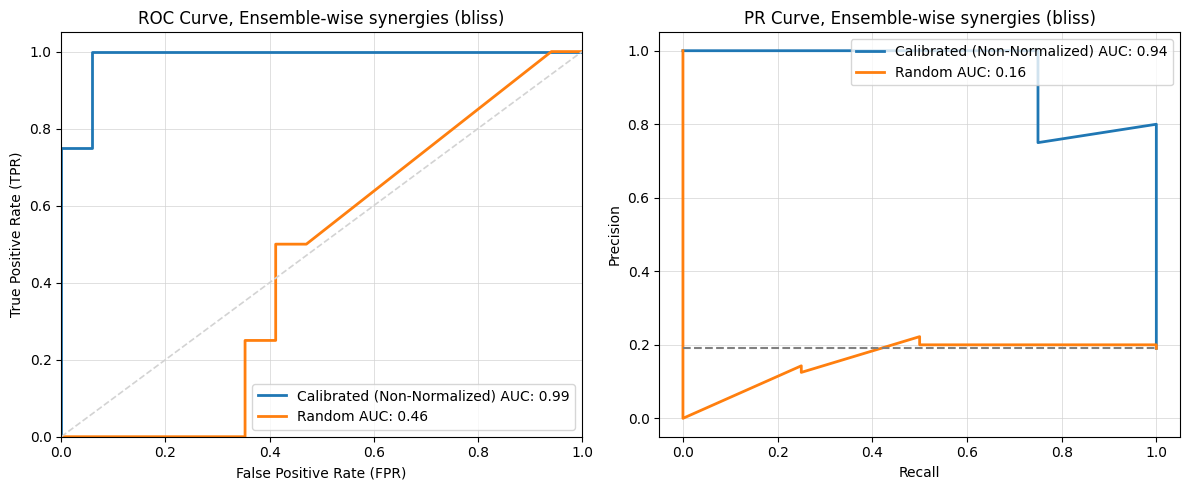

In [35]:
compare_two_simulations(best_boolean_models_calibrated, best_boolean_models_random, observed_synergy_scores,
                            model_outputs,perturbations, 'bliss','Calibrated (Non-Normalized)',
                            'Random', False)
    

### Sampling

The `sampling_with_ci` function performs sampling on a list of Boolean models, calculates confidence intervals, and plots a Precision-Recall (PR) curve to assess the predictive performance in identifying synergistic drug combinations.

#### Parameters:

- `boolean_models`: A list of `BooleanModel` instances used for the sampling.
- `observed_synergy_scores`: A list of observed synergy scores.
- `model_outputs`: An instance of `ModelOutputs`.
- `perturbations`: An instance of `Perturbation`.
- `synergy_method` (optional): The method for assessing synergy. Options: `'hsa'` (Highest Single Agent) or  `'bliss'` (Bliss Independence). By default, `'hsa'`.
- `repeat_time` (optional): The number of times to repeat the sampling process. By defualt, `10`.
- `sub_ratio` (optional): The proportion of models to sample in each iteration. By defualt, `0.8`.
- `boot_n` (optional): The number of bootstrap iterations for calculating confidence intervals. By defualt, `1000`.
- `confidence_level` (optional): The confidence level used for the interval calculations. By defualt, `0.9`.
- `plot_discrete` (optional): Whether to plot discrete points instead of continuous line on the PR curve. By defualt, `False`.
- `with_seeds` (optional): Whether to use a fixed seed for reproducibility. By defualt, `True`.
- `seeds` (optional): The seed value to ensure reproducibility. By defualt, `42`.


In [36]:
from pydruglogics.model.Statistics import sampling_with_ci

2024-11-10 15:03:58,343 - INFO - 
Response Matrix:
2024-11-10 15:03:58,344 - INFO -       e14_s2 e8_s2 e19_s2 e24_s2 e1_s1 e9_s3 e14_s1 e22_s3 e4_s2 e15_s3  \
PI-PD     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
PI-CT    3.0   3.0    3.0    3.0   3.0   3.0    3.0    3.0   3.0     NA   
PI-BI    3.0   3.0    3.0    3.0   3.0   3.0    3.0    3.0   3.0     NA   
PI-PK    1.0    NA    1.0    1.0   1.0    NA    1.0     NA   0.0     NA   
PI-AK    3.0   1.0    3.0    3.0   3.0   1.0    3.0    1.0   2.0    2.0   
PI-5Z    2.0   3.0    2.0    2.0    NA   3.0    2.0     NA   3.0     NA   
PD-CT     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
PD-BI    3.0   3.0    3.0    3.0   3.0   3.0    3.0    3.0   2.0    2.0   
PD-PK     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
PD-AK     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
PD-5Z     NA    NA     NA     NA    NA    NA     NA     NA    NA     NA   
CT-BI    3.0   3

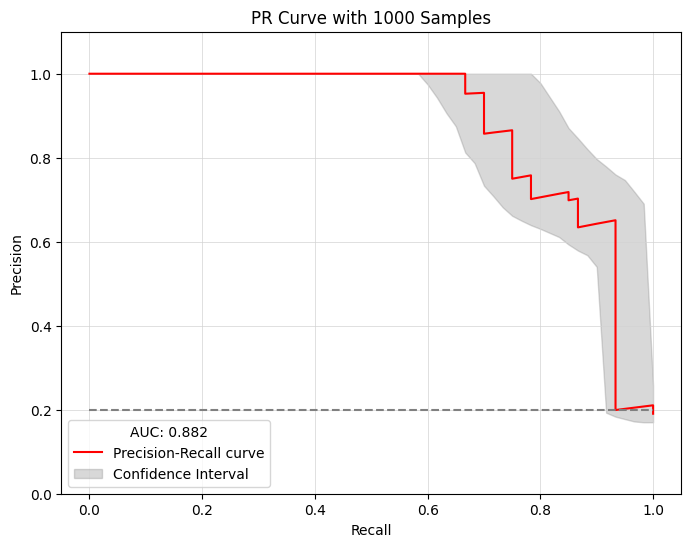

In [37]:
sampling_with_ci(best_boolean_models_calibrated, observed_synergy_scores, model_outputs, perturbations,
                     repeat_time=15, sub_ratio=0.8, boot_n=1000, plot_discrete=False, with_seeds=True)